In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import io
import sys
import os
sns.set()

In [2]:
path = "/home/marcus-fortes/semantix-big-data-science/trabalho-final/microdados_enem_2021/DADOS/splited_data/"

In [3]:
splited_files = os.listdir(path)

In [4]:
splited_files

['file_part_23',
 'file_part_05',
 'file_part_26',
 'file_part_17',
 'file_part_07',
 'file_part_24',
 'file_part_03',
 'file_part_16',
 'file_part_08',
 'file_part_27',
 'file_part_11',
 'file_part_10',
 'file_part_30',
 'file_part_21',
 'file_part_02',
 'file_part_28',
 'file_part_01',
 'file_part_00',
 'file_part_20',
 'file_part_22',
 'file_part_15',
 'file_part_25',
 'file_part_04',
 'file_part_12',
 'file_part_14',
 'file_part_06',
 'file_part_19',
 'file_part_09',
 'file_part_32',
 'file_part_29',
 'file_part_33',
 'file_part_13',
 'file_part_31',
 'file_part_18']

In [5]:
df_enem=pd.read_csv("../file_part_00.csv",encoding='latin-1',sep=";")

In [6]:
df_enem.head(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B
5,210052391248,2021,10,F,1,3,1,1,9,1,...,A,A,A,A,A,A,B,A,A,B
6,210052615524,2021,9,F,0,3,1,1,6,1,...,B,A,A,B,B,A,C,A,A,B
7,210054368957,2021,4,F,1,1,1,1,1,1,...,B,A,A,C,B,A,D,B,B,B
8,210053417016,2021,8,F,1,3,1,2,0,2,...,B,A,A,B,A,A,B,A,A,B
9,210051128744,2021,4,F,1,3,1,2,0,2,...,B,A,B,C,B,A,C,A,A,B


In [7]:
df_enem.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [8]:
df_enem.describe(include='all')

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,9.999900e+04,99999.0,99999.000000,99999,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,5,5,2,5,2,2,5,2,5,2
top,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,A,A,A,B,A,A,D,A,A,B
freq,NaN,NaN,NaN,70054,NaN,NaN,NaN,NaN,NaN,NaN,...,54558,97798,81457,69988,82266,81709,30148,87154,47817,89332
mean,2.100527e+11,2021.0,4.450045,NaN,1.027610,2.100371,1.026750,1.656497,1.723987,1.510425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.979540e+05,0.0,3.263393,NaN,0.346713,1.011542,0.192964,0.654626,3.450239,0.592415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.100510e+11,2021.0,1.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.100519e+11,2021.0,2.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.100527e+11,2021.0,3.000000,NaN,1.000000,2.000000,1.000000,2.000000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.100536e+11,2021.0,5.000000,NaN,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_enem["TX_RESPOSTAS_CH"].head(10)

0    BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB
1    ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE
2                                              NaN
3    CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC
4    CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC
5                                              NaN
6    BBDDABEBACCBBAECEBABAEEBEDBAEBADAEEDAEDDCABBE
7                                              NaN
8    BDBCDAAEEBEAABEDEBAACCCCBABCCAAEBBCABAEAEDEDA
9    EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD
Name: TX_RESPOSTAS_CH, dtype: object

In [10]:
df_enem["NU_NOTA_LC"].head(10)

0    472.6
1    498.3
2      NaN
3    638.9
4    457.6
5      NaN
6    420.4
7      NaN
8    450.7
9    494.6
Name: NU_NOTA_LC, dtype: float64

In [11]:
data_enem = df_enem.drop(['NU_INSCRICAO','TP_SEXO','TP_ESTADO_CIVIL','TP_COR_RACA','TP_NACIONALIDADE','TP_ESCOLA','TP_ENSINO','IN_TREINEIRO','CO_MUNICIPIO_ESC','NO_MUNICIPIO_ESC','CO_UF_ESC','SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC','CO_MUNICIPIO_PROVA','NO_MUNICIPIO_PROVA','CO_UF_PROVA','SG_UF_PROVA', 'TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TP_LINGUA','TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT','Q001','Q002','Q003','Q004','Q005','Q006','Q007','Q008','Q009','Q010','Q011','Q012','Q013','Q014','Q015','Q016','Q017','Q018','Q019','Q020','Q021','Q022','Q023'],axis=1)

In [12]:
data_enem.isnull().sum()

NU_ANO                   0
TP_FAIXA_ETARIA          0
TP_ST_CONCLUSAO          0
TP_ANO_CONCLUIU          0
TP_PRESENCA_CN           0
TP_PRESENCA_CH           0
TP_PRESENCA_LC           0
TP_PRESENCA_MT           0
CO_PROVA_CN          21580
CO_PROVA_CH          18391
CO_PROVA_LC          18391
CO_PROVA_MT          21580
NU_NOTA_CN           21580
NU_NOTA_CH           18391
NU_NOTA_LC           18391
NU_NOTA_MT           21580
TP_STATUS_REDACAO    18391
NU_NOTA_COMP1        18391
NU_NOTA_COMP2        18391
NU_NOTA_COMP3        18391
NU_NOTA_COMP4        18391
NU_NOTA_COMP5        18391
NU_NOTA_REDACAO      18391
Q024                     0
Q025                     0
dtype: int64

In [13]:
data_enem.describe(include="all")

,NU_ANO,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,...,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q024,Q025
count,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,78419.000000,81608.000000,...,78419.000000,81608.000000,81608.000000,81608.000000,81608.000000,81608.000000,81608.000000,81608.000000,99999,99999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,B
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47817,89332
mean,2021.0,4.450045,1.656497,1.723987,0.785178,0.818528,0.818528,0.785178,914.305538,885.161124,...,535.646415,1.096964,124.360357,147.551956,122.128468,136.479757,126.123174,656.643711,NaN,NaN
std,0.0,3.263393,0.654626,3.450239,0.411892,0.388563,0.388563,0.411892,19.313878,23.139263,...,112.429210,0.663996,32.824113,45.118238,36.241546,39.066877,59.263046,189.747364,NaN,NaN
min,2021.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,909.000000,879.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,2021.0,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,910.000000,880.000000,...,443.900000,1.000000,120.000000,120.000000,100.000000,120.000000,100.000000,540.000000,NaN,NaN
50%,2021.0,3.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,911.000000,881.000000,...,513.500000,1.000000,120.000000,140.000000,120.000000,120.000000,140.000000,640.000000,NaN,NaN
75%,2021.0,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,912.000000,882.000000,...,614.000000,1.000000,140.000000,200.000000,140.000000,160.000000,180.000000,800.000000,NaN,NaN


In [14]:
data_enem_mv = data_enem.dropna(axis=0)

In [15]:
data_enem_mv.describe()

,NU_ANO,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,...,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,78232.0,78232.000000,78232.000000,78232.000000,78232.0,78232.0,78232.0,78232.0,78232.000000,78232.000000,...,78232.000000,78232.000000,78232.000000,78232.000000,78232.000000,78232.000000,78232.000000,78232.000000,78232.000000,78232.000000
mean,2021.0,4.034922,1.706463,1.450902,1.0,1.0,1.0,1.0,914.299059,884.980098,...,527.886034,507.054846,535.724684,1.080287,125.414664,149.044381,123.323193,137.829533,128.024082,663.635852
std,0.0,2.963263,0.654005,3.124314,0.0,0.0,0.0,0.0,19.297806,22.702716,...,94.516371,78.157851,112.389278,0.611433,31.811742,44.133513,35.382605,38.094523,58.401646,184.712597
min,2021.0,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,909.000000,879.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.0,2.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,910.000000,880.000000,...,454.000000,452.300000,443.900000,1.000000,120.000000,120.000000,100.000000,120.000000,100.000000,560.000000
50%,2021.0,3.000000,2.000000,0.000000,1.0,1.0,1.0,1.0,911.000000,881.000000,...,530.100000,509.300000,513.600000,1.000000,120.000000,140.000000,120.000000,120.000000,140.000000,660.000000
75%,2021.0,4.250000,2.000000,1.000000,1.0,1.0,1.0,1.0,912.000000,882.000000,...,595.900000,562.100000,614.100000,1.000000,160.000000,200.000000,140.000000,160.000000,180.000000,820.000000
max,2021.0,20.000000,4.000000,15.000000,1.0,1.0,1.0,1.0,1014.000000,1002.000000,...,832.500000,794.200000,953.100000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


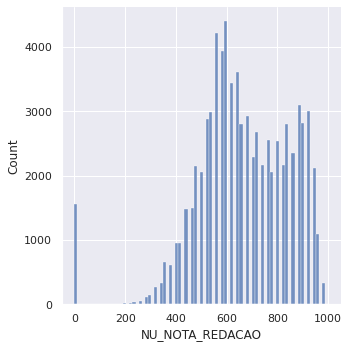

In [16]:
sns.displot(data_enem_mv['NU_NOTA_REDACAO'])

In [17]:
redacao_maior_0=data_enem_mv[data_enem_mv['NU_NOTA_REDACAO']>0]

In [18]:
redacao_maior_0.describe()

,NU_ANO,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,...,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,76665.0,76665.000000,76665.000000,76665.000000,76665.0,76665.0,76665.0,76665.0,76665.000000,76665.000000,...,76665.000000,76665.000000,76665.000000,76665.0,76665.000000,76665.000000,76665.000000,76665.000000,76665.000000,76665.000000
mean,2021.0,4.032844,1.701494,1.463745,1.0,1.0,1.0,1.0,914.309855,884.992669,...,529.636583,508.664141,537.324972,1.0,127.978086,152.090785,125.843866,140.646710,130.640840,677.200287
std,0.0,2.952137,0.653134,3.131596,0.0,0.0,0.0,0.0,19.324663,22.732429,...,93.874597,77.343501,112.480468,0.0,26.544408,39.041555,30.988748,32.933615,56.023278,160.094242
min,2021.0,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,909.000000,879.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,40.000000,0.000000,0.000000,0.000000,40.000000
25%,2021.0,2.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,910.000000,880.000000,...,456.200000,454.600000,445.200000,1.0,120.000000,120.000000,100.000000,120.000000,100.000000,560.000000
50%,2021.0,3.000000,2.000000,0.000000,1.0,1.0,1.0,1.0,911.000000,881.000000,...,532.100000,510.800000,515.800000,1.0,120.000000,140.000000,120.000000,140.000000,140.000000,660.000000
75%,2021.0,5.000000,2.000000,1.000000,1.0,1.0,1.0,1.0,912.000000,882.000000,...,597.000000,563.100000,616.200000,1.0,160.000000,200.000000,140.000000,160.000000,180.000000,820.000000
max,2021.0,20.000000,4.000000,15.000000,1.0,1.0,1.0,1.0,1014.000000,1002.000000,...,832.500000,794.200000,953.100000,1.0,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


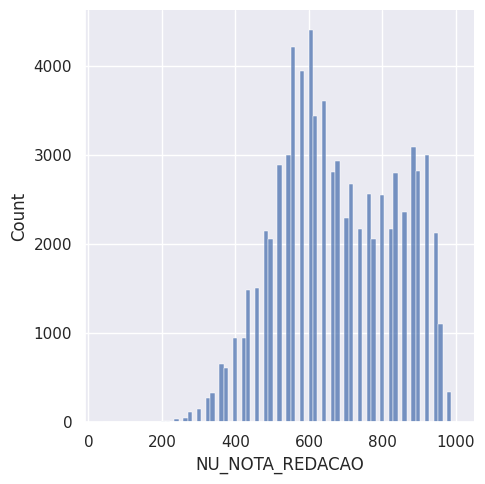

In [19]:
sns.displot(redacao_maior_0['NU_NOTA_REDACAO'])